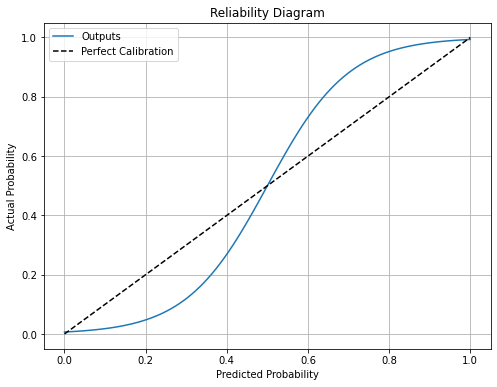

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-10 * (x - 0.5)))

# Generating synthetic data for demonstration
predicted_probabilities = np.linspace(0, 1, 100)
actual_probabilities = sigmoid(predicted_probabilities)  # Sigmoid-shaped model calibration

plt.figure(figsize=(8, 6))
plt.plot(predicted_probabilities, actual_probabilities, label='Outputs')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Probability')
plt.title('Reliability Diagram')
plt.legend()
plt.grid(True)

plt.savefig('Calibration.png')
plt.show()

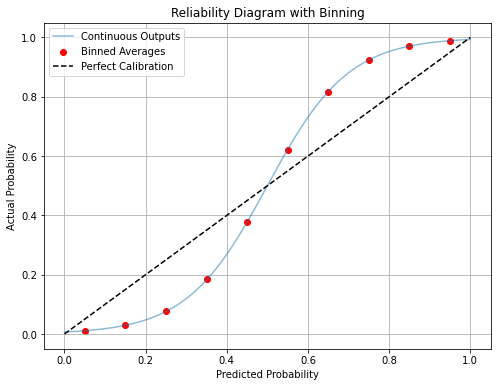

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-10 * (x - 0.5)))

# Function to bin data and calculate average actual probabilities per bin
def bin_data(predicted_probs, actual_probs, num_bins=10):
    bins = np.linspace(0, 1, num_bins+1)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    binned_actuals = np.zeros(num_bins)
    
    for i in range(num_bins):
        # Get indices of probabilities within this bin
        indices = np.where((predicted_probs >= bins[i]) & (predicted_probs < bins[i+1]))[0]
        if len(indices) > 0:
            # Calculate average of actual probabilities in this bin
            binned_actuals[i] = np.mean(actual_probs[indices])
    
    return bin_centers, binned_actuals

# Generating synthetic data for demonstration
predicted_probabilities = np.linspace(0, 1, 100)
actual_probabilities = sigmoid(predicted_probabilities)

# Bin data
bin_centers, binned_actuals = bin_data(predicted_probabilities, actual_probabilities, num_bins=10)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(predicted_probabilities, actual_probabilities, label='Continuous Outputs', alpha=0.5)
plt.scatter(bin_centers, binned_actuals, color='red', label='Binned Averages')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Probability')
plt.title('Reliability Diagram with Binning')
plt.legend()
plt.grid(True)

# Save the plot as PNG
#plt.savefig('Calibration_with_Binning.png')
plt.show()

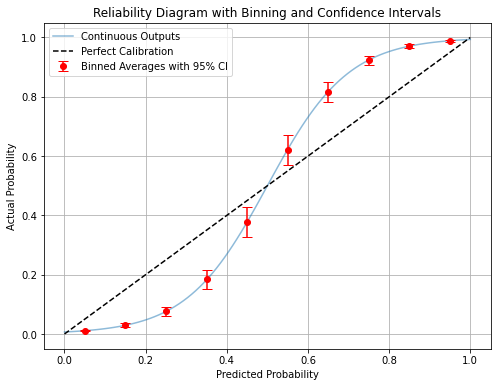

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def sigmoid(x):
    return 1 / (1 + np.exp(-10 * (x - 0.5)))

def bin_data_with_confidence_intervals(predicted_probs, actual_probs, num_bins=10):
    bins = np.linspace(0, 1, num_bins + 1)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    binned_actuals = np.zeros(num_bins)
    confidence_intervals = np.zeros((num_bins, 2))
    
    for i in range(num_bins):
        indices = np.where((predicted_probs >= bins[i]) & (predicted_probs < bins[i+1]))[0]
        if len(indices) > 0:
            bin_actual_probs = actual_probs[indices]
            binned_actuals[i] = np.mean(bin_actual_probs)
            # Calculate 95% confidence interval for the mean
            ci = stats.sem(bin_actual_probs) * stats.t.ppf((1 + 0.95) / 2., len(bin_actual_probs)-1)
            confidence_intervals[i] = [binned_actuals[i] - ci, binned_actuals[i] + ci]
    
    return bin_centers, binned_actuals, confidence_intervals

# Generating synthetic data for demonstration
predicted_probabilities = np.linspace(0, 1, 100)
actual_probabilities = sigmoid(predicted_probabilities)

# Bin data and calculate confidence intervals
bin_centers, binned_actuals, confidence_intervals = bin_data_with_confidence_intervals(predicted_probabilities, actual_probabilities, num_bins=10)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(predicted_probabilities, actual_probabilities, label='Continuous Outputs', alpha=0.5)
plt.errorbar(bin_centers, binned_actuals, yerr=[binned_actuals - confidence_intervals[:, 0], confidence_intervals[:, 1] - binned_actuals], fmt='o', color='red', label='Binned Averages with 95% CI', capsize=5)
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Probability')
plt.title('Reliability Diagram with Binning and Confidence Intervals')
plt.legend()
plt.grid(True)

plt.savefig('Calibration_with_Binning_and_CI.png')
plt.show()
